<div style="text-align: center;"><h1> Car Price Prediction</h1></div>

<div class='alert alert-info'>
<h3><b><i>This Jupyter Notebook delves into the world of car price prediction. We'll explore the factors that influence a car's value, from brand reputation and features to horsepower and mileage. By leveraging machine learning, we'll build a model that can predict a car's price based on its characteristics. This journey will involve data exploration, feature engineering, model training, and evaluation, ultimately aiming to unveil the key features that drive car prices in the market.

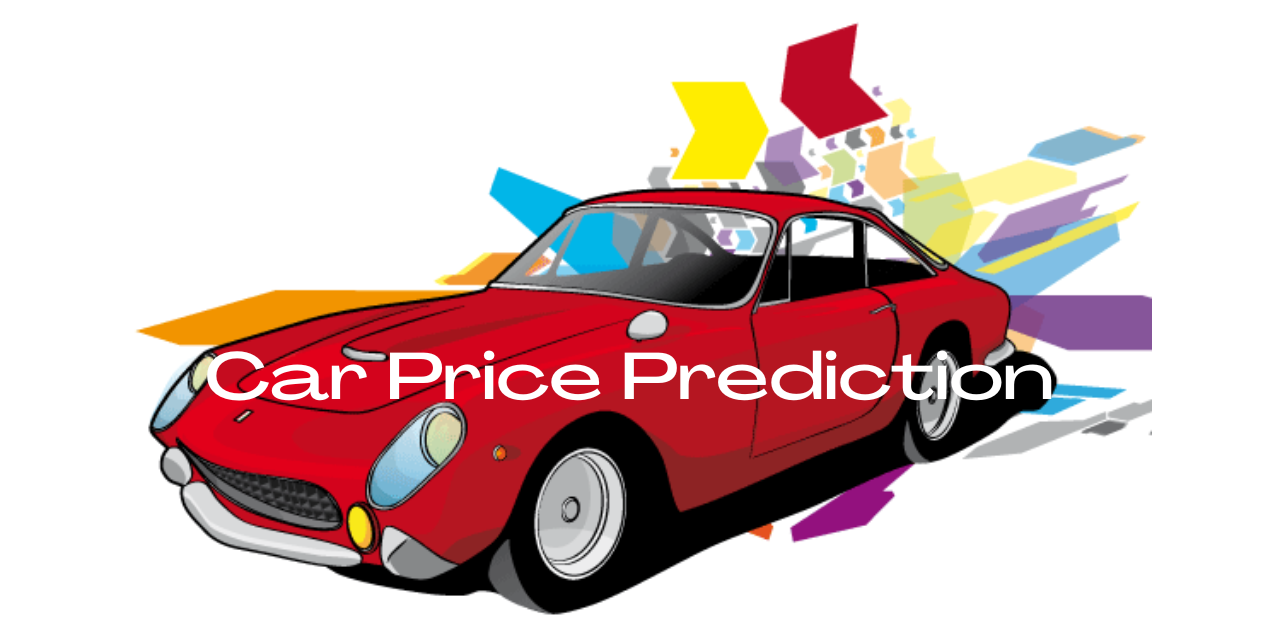

## For Kaggle Dataset - [Click here](https://www.kaggle.com/datasets/goyalshalini93/car-data)

------------

## Importing Libraries
We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

## Performing Exploratory Data Analysis

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
print("Unique values in aspiration column",df['aspiration'].unique())
print("Unique values in doornumber column",df['doornumber'].unique())
print("Unique values in carbody column",df['carbody'].unique())
print("Unique values in drivewheel column",df['drivewheel'].unique())
print("Unique values in enginelocation column",df['enginelocation'].unique())
print("Unique values in enginetype column",df['enginetype'].unique())
print("Unique values in cylindernumber column",df['cylindernumber'].unique())
print("Unique values in fuelsystem column",df['fuelsystem'].unique())

Unique values in aspiration column ['std' 'turbo']
Unique values in doornumber column ['two' 'four']
Unique values in carbody column ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drivewheel column ['rwd' 'fwd' '4wd']
Unique values in enginelocation column ['front' 'rear']
Unique values in enginetype column ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber column ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem column ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [10]:
conversion_dict = {'four': 4.0, 'six': 6.0, 'five': 5.0, 'three': 3.0, 'twelve': 12.0, 'two': 2.0, 'eight': 8.0}
df['cylindernumber'] = df['cylindernumber'].replace(conversion_dict)

In [11]:
to_drop=['CarName','fuelsystem','enginetype','carbody','enginelocation']
final_df = df.drop(columns=[col for col in df.columns if col in to_drop])
final_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,...,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,...,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,rwd,94.5,171.2,65.5,52.4,...,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,fwd,99.8,176.6,66.2,54.3,...,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,4wd,99.4,176.6,66.4,54.3,...,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
final_df=pd.get_dummies(final_df)
final_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,...,13495.0,False,True,True,False,False,True,False,False,True
1,2,3,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,...,16500.0,False,True,True,False,False,True,False,False,True
2,3,1,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,...,16500.0,False,True,True,False,False,True,False,False,True
3,4,2,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,...,13950.0,False,True,True,False,True,False,False,True,False
4,5,2,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,...,17450.0,False,True,True,False,True,False,True,False,False


In [13]:
final_df.replace({False:0,True:1},inplace=True)
final_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,...,13495.0,0,1,1,0,0,1,0,0,1
1,2,3,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,...,16500.0,0,1,1,0,0,1,0,0,1
2,3,1,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,...,16500.0,0,1,1,0,0,1,0,0,1
3,4,2,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,...,13950.0,0,1,1,0,1,0,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,...,17450.0,0,1,1,0,1,0,1,0,0


In [14]:
final_df.dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber      float64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
fueltype_diesel       int64
fueltype_gas          int64
aspiration_std        int64
aspiration_turbo      int64
doornumber_four       int64
doornumber_two        int64
drivewheel_4wd        int64
drivewheel_fwd        int64
drivewheel_rwd        int64
dtype: object

## Performing Data Visualization

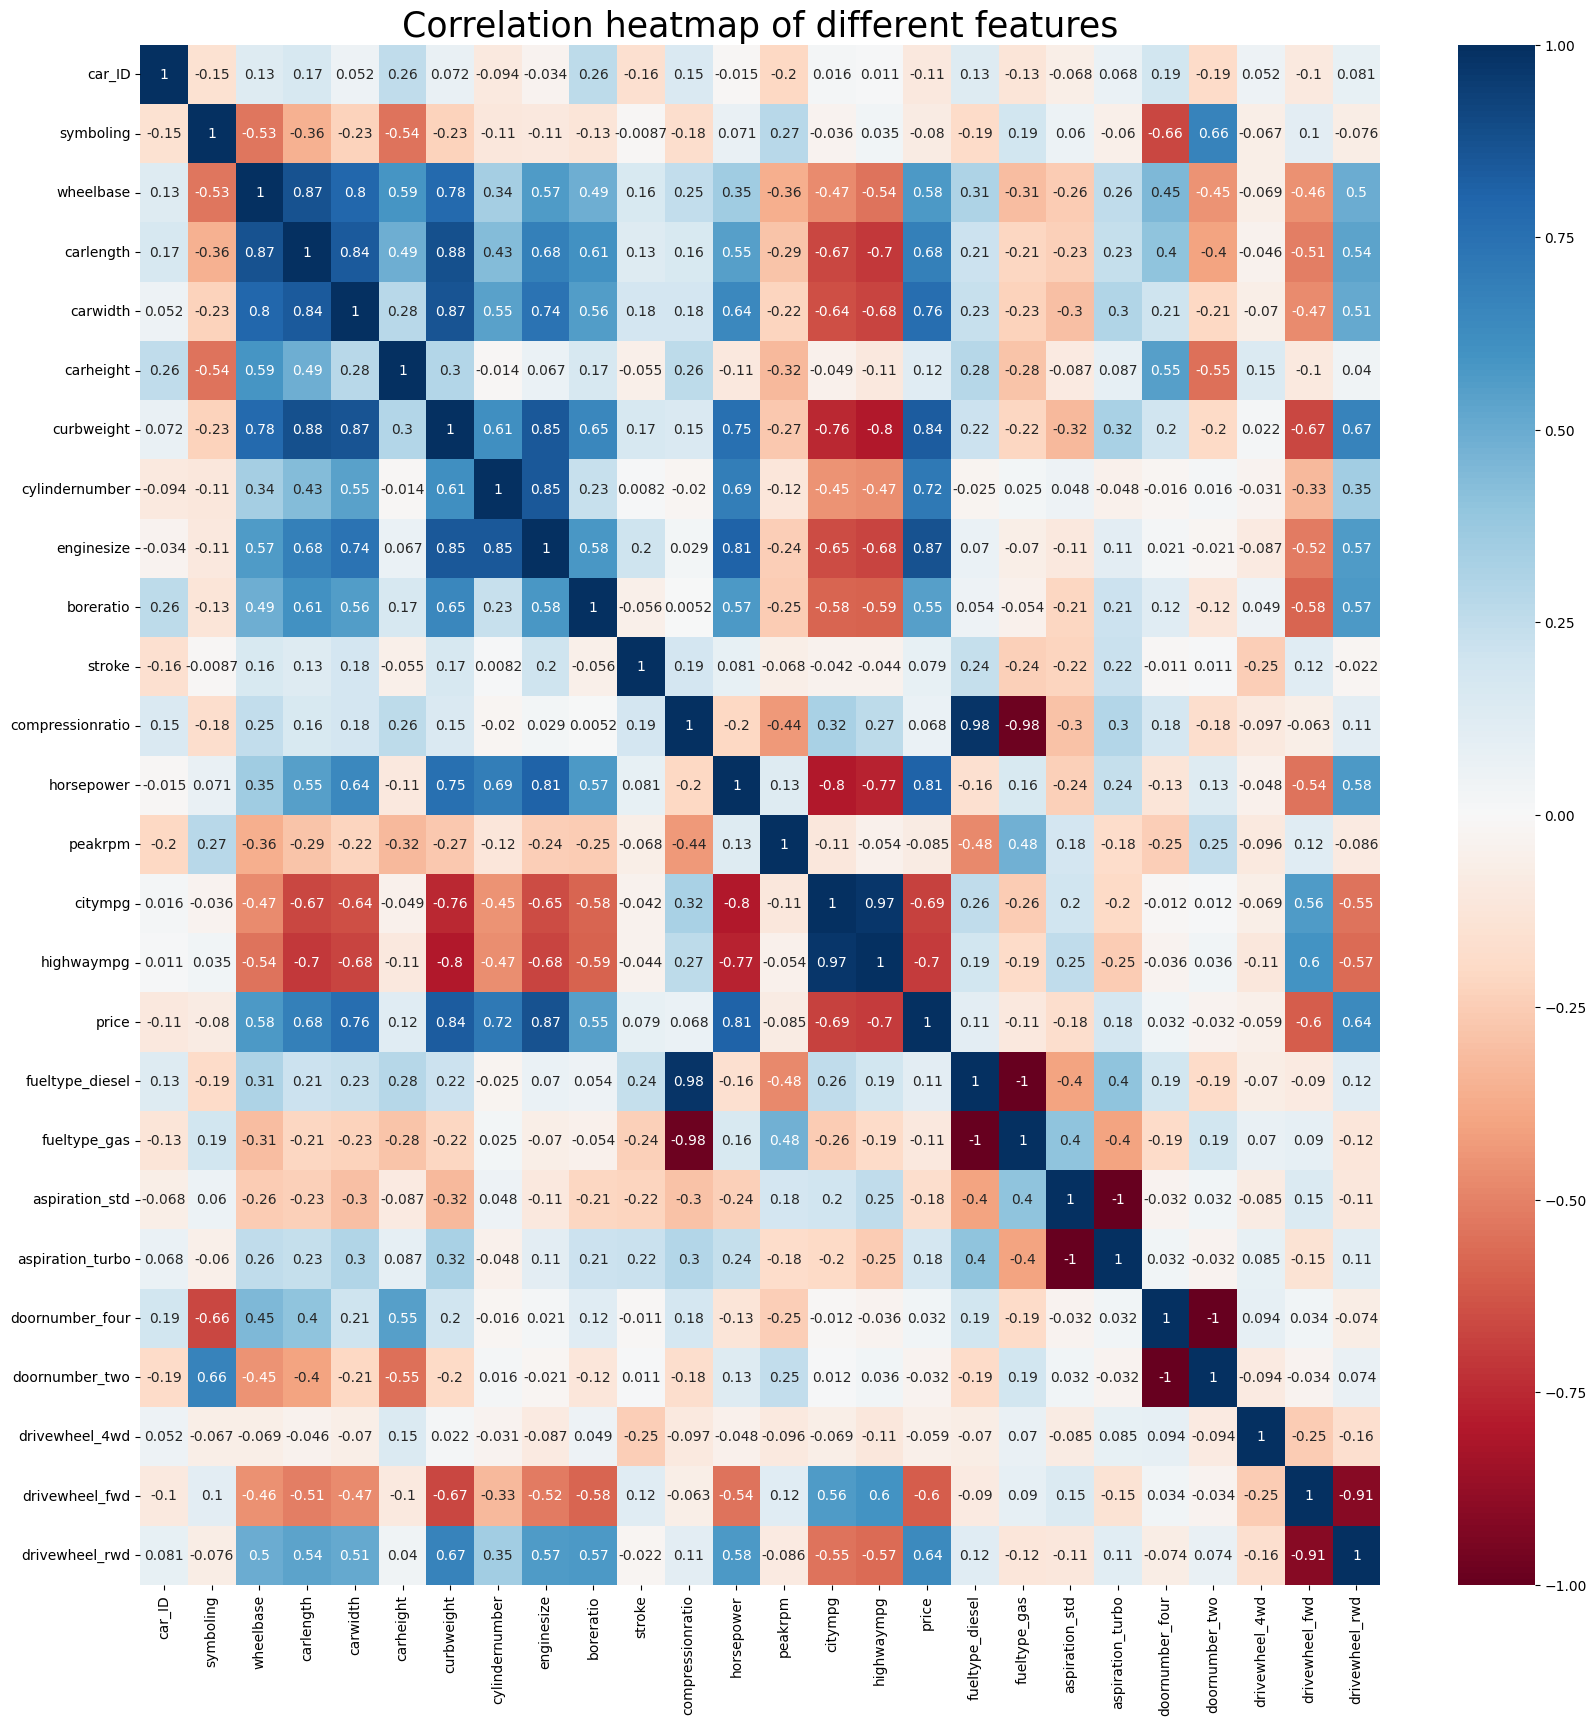

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,cmap='RdBu')
plt.title("Correlation heatmap of different features",fontsize=25)
plt.show()

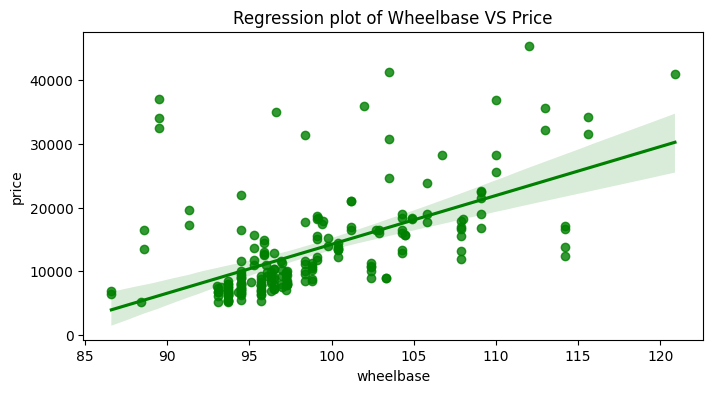

In [16]:
plt.subplots(figsize=(8,4))
sns.regplot(x='wheelbase',y='price',data=df,color='green')
plt.title("Regression plot of Wheelbase VS Price")
plt.show()

> #### The above regression plot shows the positive correlation b/w Wheelbase and Price

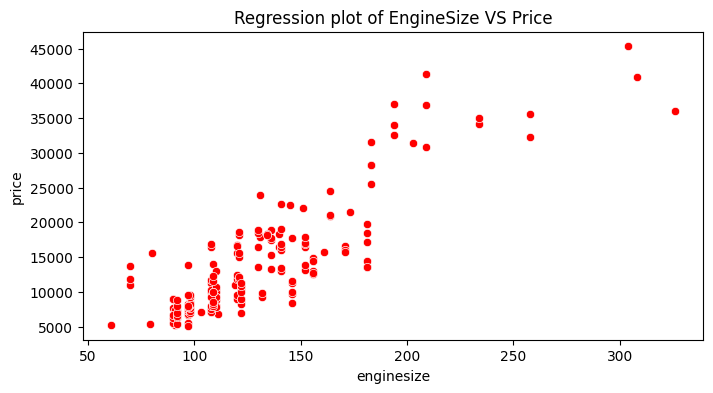

In [17]:
plt.subplots(figsize=(8,4))
sns.scatterplot(x='enginesize',y='price',data=df,color='red')
plt.title("Regression plot of EngineSize VS Price")
plt.show()

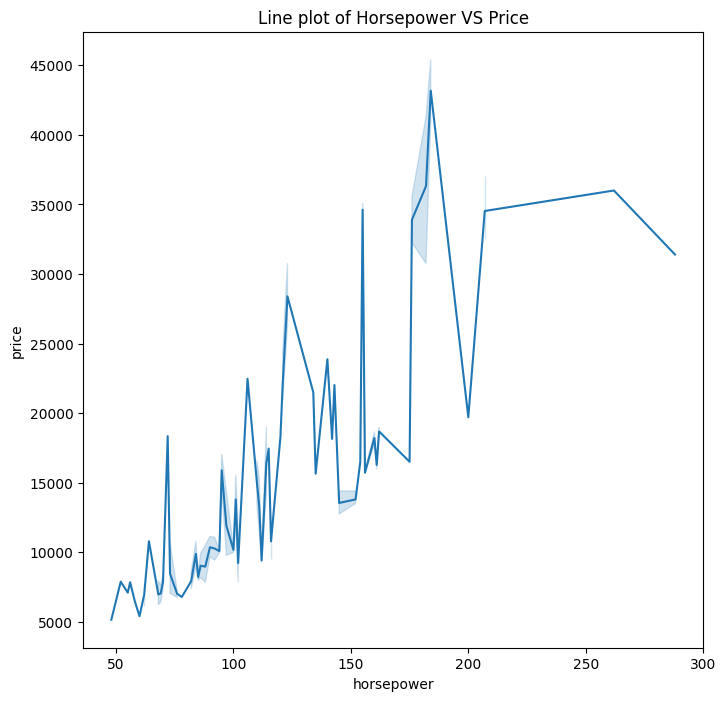

In [18]:
plt.subplots(figsize=(8,8))
sns.lineplot(x='horsepower',y='price',data=df)
plt.title("Line plot of Horsepower VS Price")
plt.show()

> #### This shows that as the Horsepower increases, the price also increases on a broader basis

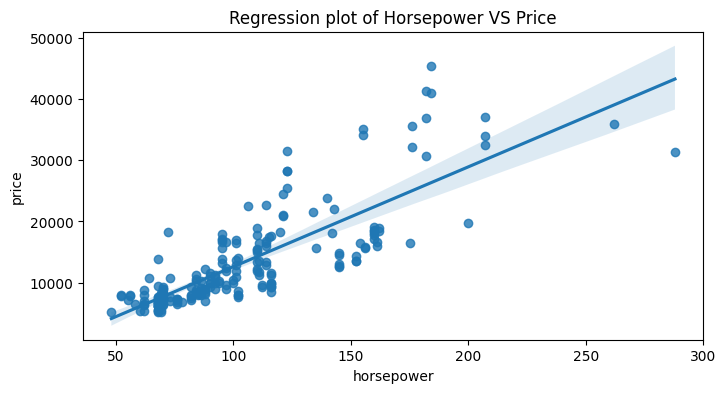

In [19]:
plt.subplots(figsize=(8,4))
sns.regplot(x='horsepower',y='price',data=df)
plt.title("Regression plot of Horsepower VS Price")
plt.show()

> #### This shows that as the Horsepower increases, the price also increases.

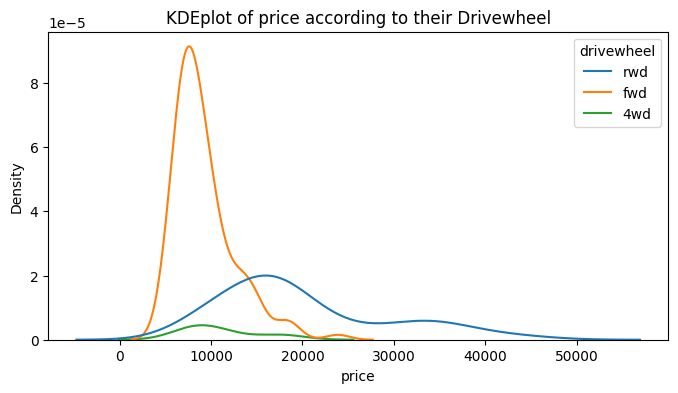

In [20]:
plt.subplots(figsize=(8,4))
sns.kdeplot(x=df['price'],hue=df['drivewheel'])
plt.title("KDEplot of price according to their Drivewheel")
plt.show()

> ####  Interestingly, the data shows that front-wheel drive (FWD) cars are generally priced lower. 

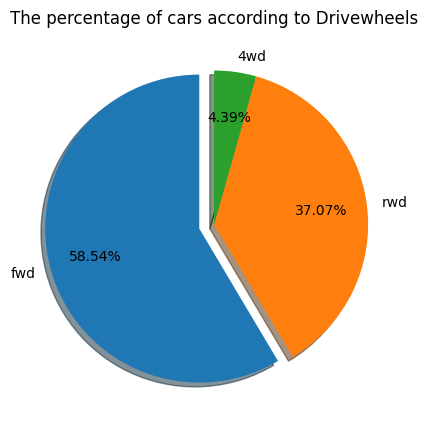

In [21]:
plt.subplots(figsize=(5,5))
(df['drivewheel'].value_counts()/len(df)*100).plot(kind='pie',autopct='%1.2f%%',pctdistance=0.70,startangle=90,shadow=True,explode=[0.1,0,0])
plt.ylabel('')
plt.title("The percentage of cars according to Drivewheels")
plt.show()

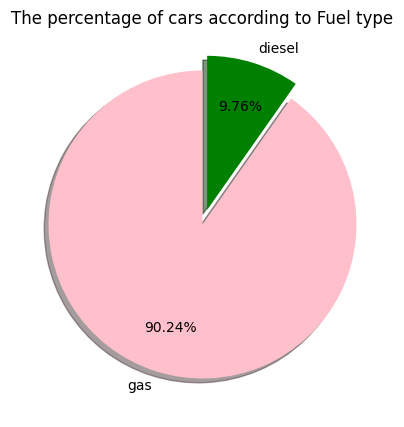

In [22]:
plt.subplots(figsize=(5,5))
(df['fueltype'].value_counts()/len(df)*100).plot(kind='pie',autopct='%1.2f%%',pctdistance=0.70,startangle=90,shadow=True,explode=[0,0.1],colors=["pink","green"])
plt.ylabel('')
plt.title("The percentage of cars according to Fuel type")
plt.show()

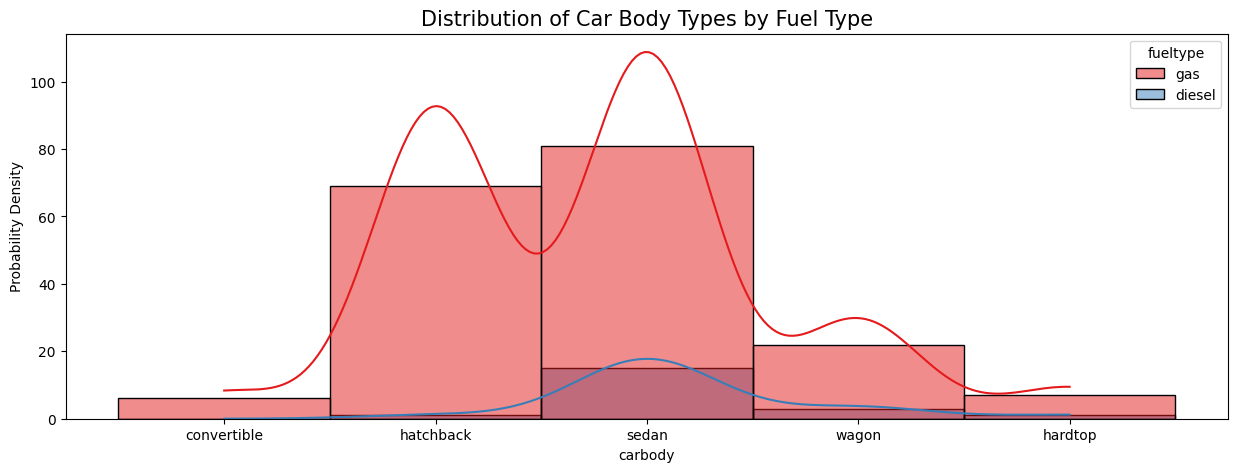

In [23]:
plt.subplots(figsize=(15,5))
sns.histplot(x="carbody",data=df,hue="fueltype",kde=True,palette="Set1")
plt.title("Distribution of Car Body Types by Fuel Type",fontsize=15)
plt.ylabel("Probability Density")
plt.show()

## Predictive Modelling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=final_df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower','citympg',
       'highwaympg', 'price','aspiration_std','drivewheel_fwd', 'drivewheel_rwd']]
Y=final_df['price']

### Splitting the dataset into training and testing 

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [27]:
print("\n",X_train.shape,"\n",X_test.shape,"\n",Y_train.shape,"\n",Y_test.shape,"\n")


 (164, 14) 
 (41, 14) 
 (164,) 
 (41,) 



> #### We are using both Multi Linear Regression and Random Forest Regression. Later, we will see by the metrics that which one performs better.

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [29]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [30]:
regr=linear_model.LinearRegression()
regr

LinearRegression()

In [31]:
regr.fit(X_train,Y_train)


LinearRegression()

In [32]:
yhat=regr.predict(X_test)

In [33]:
yhat

array([16500. , 12629. ,  5389. , 14399. , 34184. ,  8195. , 19699. ,
       13295. , 15040. , 24565. , 16925. , 13415. ,  9298. ,  6529. ,
        7129. , 28176. ,  8949. ,  9495. , 15998. , 14869. , 16845. ,
        5348. ,  8916.5, 10595. , 15580. ,  5151. ,  5499. , 11595. ,
        7349. ,  7099. ,  6692. , 13860. , 17710. ,  6649. , 17950. ,
       32250. , 15510. , 22625. , 12940. , 11199. ,  6849. ])

### Model Evaluation

 #### Let's look the metrics for the Multi Linear Regression model

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R squared for the model is = ",r2_score(yhat,Y_test)," which shows that it is performing extremely well!\n")
print("The Mean Squared Error for the model is = ",mean_squared_error(yhat,Y_test)," which shows that it is performing extremely well!\n")
print()

The R squared for the model is =  1.0  which shows that it is performing extremely well!

The Mean Squared Error for the model is =  1.1269831467612714e-22  which shows that it is performing extremely well!




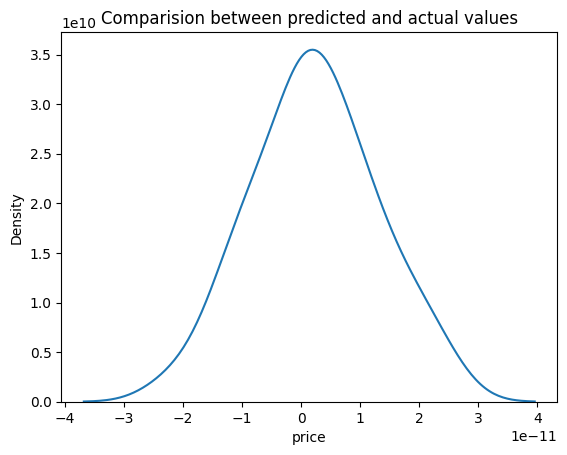

In [35]:
sns.kdeplot(Y_test-yhat)
plt.title("Comparision between predicted and actual values")
plt.show()

> #### The above plot shows that the predicted are very close to the actual values

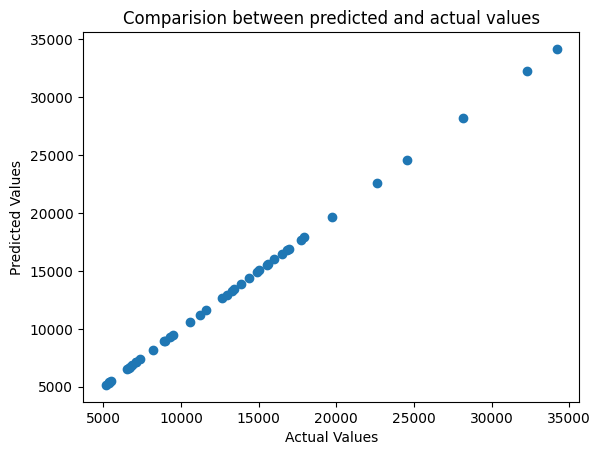

In [36]:
plt.scatter(Y_test,yhat)
plt.title("Comparision between predicted and actual values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### But since the R squared came out to be perfect 1.0. It made me suspicious that if our model is overfitted or not!
### Let's check it by plotting the Learning curve

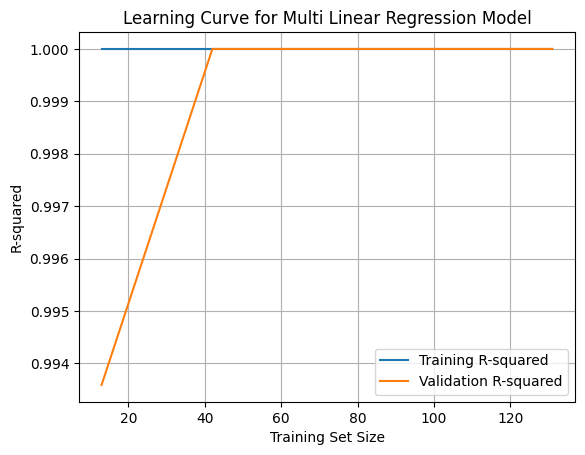

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
try:
    scoring = 'r2'
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=regr, X=X_train, y=Y_train, cv=5, scoring=scoring)
    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training R-squared')
    plt.plot(train_sizes, validation_scores_mean, label='Validation R-squared')
    plt.ylabel('R-squared')
    plt.xlabel('Training Set Size')
    plt.title('Learning Curve for Multi Linear Regression Model')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error encountered: {e}")


> #### The above learning curve shows that the model is not overfitted.Rather the dataset may be highly separable, potentially leading to a model that generalizes well.

#### Let's create a Random Forest Regressor model too

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, Y_train)
yhat2= rf.predict(X_test)
print("The R squared for the model is = ",r2_score(Y_test, yhat2)," which shows that the model is performing extremely well!")

The R squared for the model is =  0.9988763047886429  which shows that the model is performing extremely well!


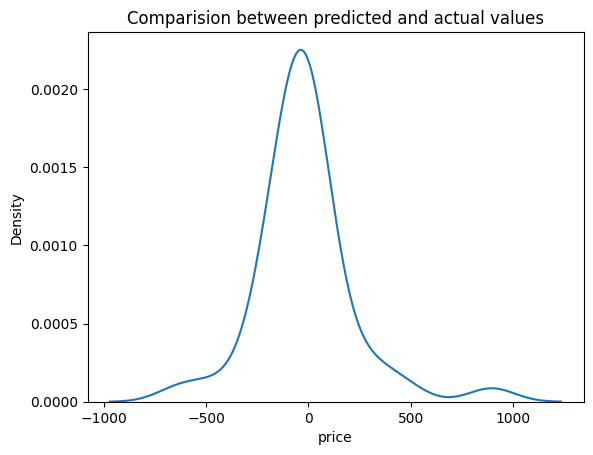

In [39]:
sns.kdeplot(Y_test-yhat2)
plt.title("Comparision between predicted and actual values")
plt.show()

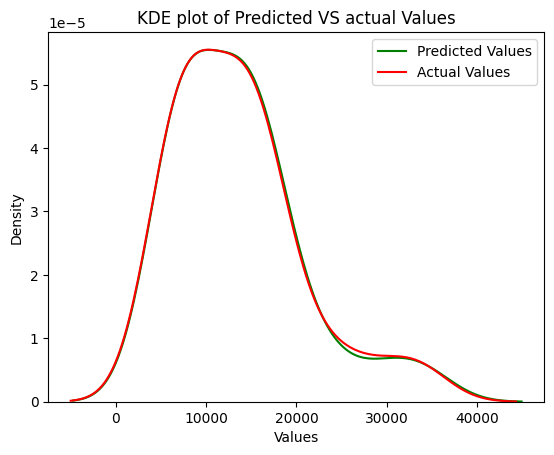

In [40]:
ax=sns.kdeplot(x=yhat2,color='green')
sns.kdeplot(x=Y_test,ax=ax,color='red')
plt.legend(["Predicted Values","Actual Values"])
plt.xlabel('Values')
plt.title('KDE plot of Predicted VS actual Values')
plt.show()

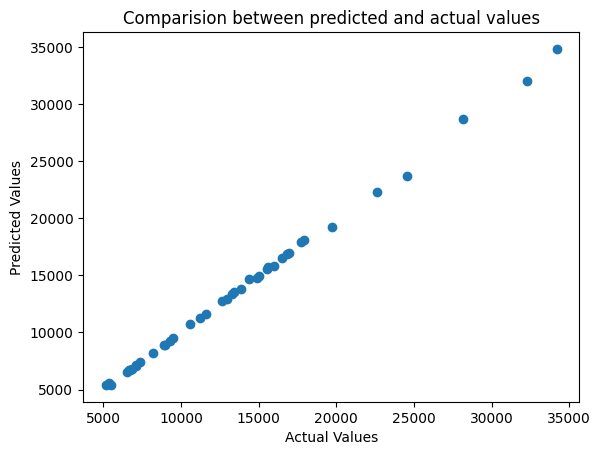

In [41]:
plt.scatter(Y_test,yhat2)
plt.title("Comparision between predicted and actual values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

> ### From the above results we can see that both of the models are performing extremely well and can be used for making predictions.

# Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)